In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [12]:
file_path = "data_all_teams_gdp.csv"
df_gdp = pd.read_csv(file_path, delimiter="\,")  

print(df_gdp.head())

   year        gdp
0     0  947610.99
1     1  931427.95
2     2  872704.64
3     3  875281.14
4     4  853371.77


C:\Users\charl\AppData\Local\Temp\ipykernel_68936\1044693080.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_gdp = pd.read_csv(file_path, delimiter="\,")


In [13]:
file_path = "data_all_teams.csv"
df = pd.read_csv(file_path, delimiter="\,")  

print(df.head())

C:\Users\charl\AppData\Local\Temp\ipykernel_68936\3647335811.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, delimiter="\,")


   year sex     profession   income
0     0   F  civil servant  5131.08
1     0   M          child     0.00
2     0   M     unemployed   124.10
3     0   M         farmer  1868.39
4     0   F          child     0.00


In [14]:
df = df.merge(df_gdp, on='year', how='left')
df.head()

,year,sex,profession,income,gdp
0,0,F,civil servant,5131.08,947610.99
1,0,M,child,0.00,947610.99
2,0,M,unemployed,124.10,947610.99
3,0,M,farmer,1868.39,947610.99
4,0,F,child,0.00,947610.99


Predicted GDP for Year 1: 931427.95
Predicted GDP for Year 2: 872704.64
Predicted GDP for Year 3: 875281.14
Predicted GDP for Year 4: 853371.77
Predicted GDP for Year 5: 901704.41


c:\Users\charl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


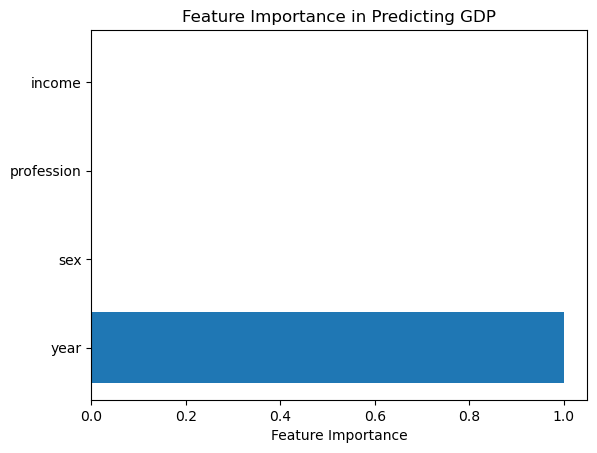

In [17]:

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])  # F -> 0, M -> 1
df['profession'] = label_encoder.fit_transform(df['profession'])

# Selecting features (X) and target (y)
X = df[['year', 'sex', 'profession', 'income']]
y = df['gdp']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Predict GDP for the next 5 years
years_to_predict = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Next 5 years

predicted_gdp = model.predict(np.hstack([years_to_predict, np.full((5, 1), 1), np.full((5, 1), 1), np.full((5, 1), 1000)]))  # Example values for 'sex', 'profession', and 'income'

# Output predictions
for year, gdp in zip(range(1, 6), predicted_gdp):
    print(f"Predicted GDP for Year {year}: {gdp:.2f}")

# Feature Importance to see which factors contribute most to GDP prediction
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting GDP")
plt.show()

In [18]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")


Mean Absolute Error: 2.0211139352036177e-09
